In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv("../Dataset/after_preprocessing.csv")

df['Experience'] = df['Years at Company'] + df['Company Tenure']
df['High Income'] = df['Monthly Income'].apply(lambda x: 1 if x > 0.5 else 0)
df['Promotion_Frequency'] = df['Number of Promotions'] / (df['Years at Company'] + 1)

df.drop(['Company Tenure', 'Years at Company', 'Monthly Income'], axis=1, inplace=True)


In [7]:
X = df.drop(columns=['Attrition'])
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h2>Visualize the New Features</h2>

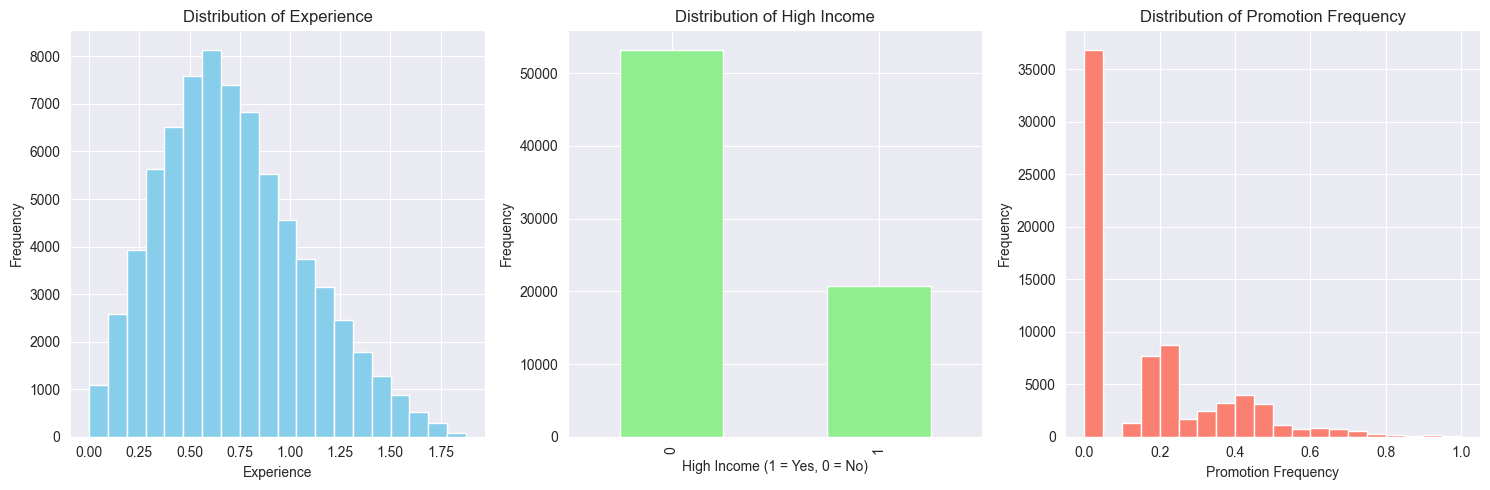

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# Experience
plt.subplot(1, 3, 1)
df['Experience'].hist(bins=20, color='skyblue')
plt.title('Distribution of Experience')
plt.xlabel('Experience')
plt.ylabel('Frequency')

# High Income
plt.subplot(1, 3, 2)
df['High Income'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribution of High Income')
plt.xlabel('High Income (1 = Yes, 0 = No)')
plt.ylabel('Frequency')

# Promotion Frequency
plt.subplot(1, 3, 3)
df['Promotion_Frequency'].hist(bins=20, color='salmon')
plt.title('Distribution of Promotion Frequency')
plt.xlabel('Promotion Frequency')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<h2>Visualize the Correlation of New Features</h2>

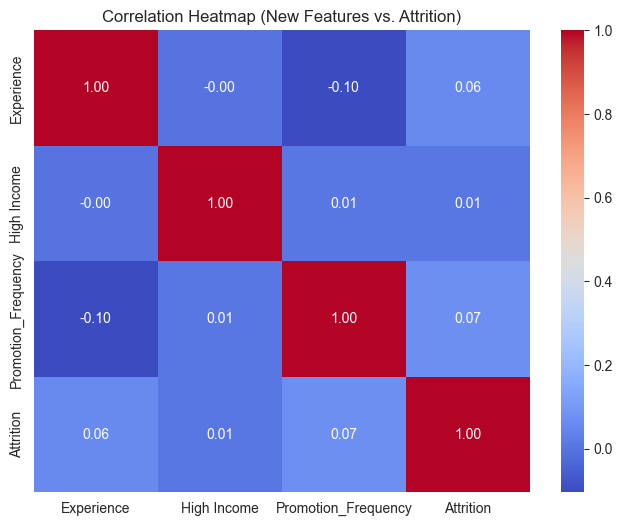

In [9]:
import seaborn as sns

corr_matrix = df[['Experience', 'High Income', 'Promotion_Frequency', 'Attrition']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (New Features vs. Attrition)')
plt.show()

<h2>Visualize the relationship between High Income and Attrition using a count plot</h2>

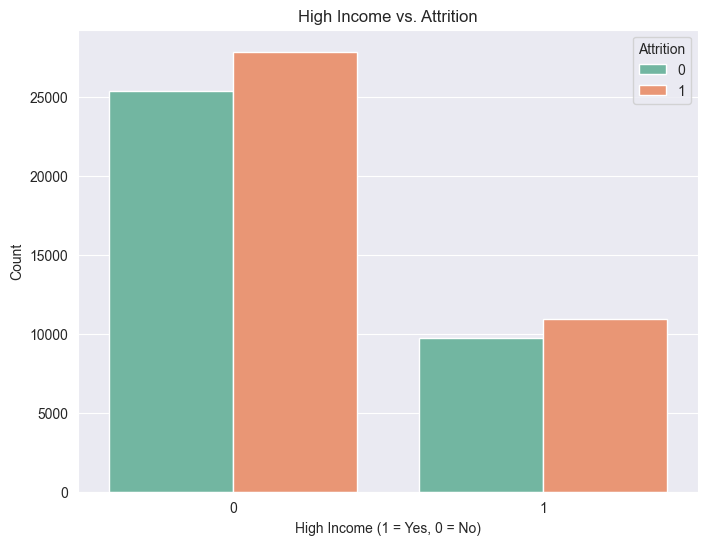

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='High Income', hue='Attrition', data=df, palette='Set2')
plt.title('High Income vs. Attrition')
plt.xlabel('High Income (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()

# KNN

In [12]:
knn = KNeighborsClassifier(n_neighbors=29)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

KNN Accuracy: 0.7070
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69      6971
           1       0.72      0.72      0.72      7812

    accuracy                           0.71     14783
   macro avg       0.71      0.71      0.71     14783
weighted avg       0.71      0.71      0.71     14783

Confusion Matrix:
[[4799 2172]
 [2159 5653]]


# Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Logistic Regression Accuracy: 0.7139
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.69      0.70      6971
           1       0.73      0.73      0.73      7812

    accuracy                           0.71     14783
   macro avg       0.71      0.71      0.71     14783
weighted avg       0.71      0.71      0.71     14783

Confusion Matrix:
[[4826 2145]
 [2085 5727]]


# SVM

In [14]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', random_state=42)  # You can try 'linear', 'poly', 'sigmoid'
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

SVM Accuracy: 0.7337
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.71      0.72      6971
           1       0.75      0.75      0.75      7812

    accuracy                           0.73     14783
   macro avg       0.73      0.73      0.73     14783
weighted avg       0.73      0.73      0.73     14783

Confusion Matrix:
[[4979 1992]
 [1945 5867]]


# Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Decision Tree Accuracy: 0.7120
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.69      0.69      6971
           1       0.73      0.73      0.73      7812

    accuracy                           0.71     14783
   macro avg       0.71      0.71      0.71     14783
weighted avg       0.71      0.71      0.71     14783

Confusion Matrix:
[[4809 2162]
 [2095 5717]]


# Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Random Forest Accuracy: 0.7469
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.74      0.73      6971
           1       0.76      0.76      0.76      7812

    accuracy                           0.75     14783
   macro avg       0.75      0.75      0.75     14783
weighted avg       0.75      0.75      0.75     14783

Confusion Matrix:
[[5140 1831]
 [1911 5901]]


<h3>ROC-AUC Curve for Random Forest</h3>

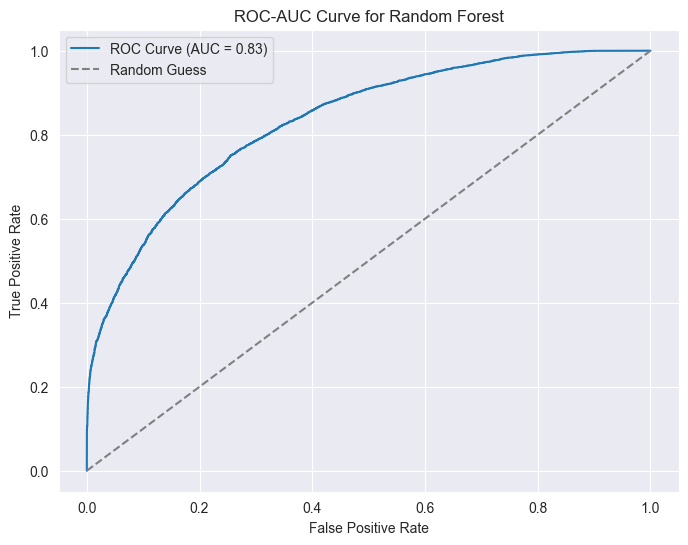

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Random Forest')
plt.legend()
plt.show()

# Gradient Boosting

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Gradient Boosting Accuracy: 0.7580
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      6971
           1       0.77      0.77      0.77      7812

    accuracy                           0.76     14783
   macro avg       0.76      0.76      0.76     14783
weighted avg       0.76      0.76      0.76     14783

Confusion Matrix:
[[5190 1781]
 [1796 6016]]


<h2>ROC-AUC Curve for Gradient Boosting</h2>

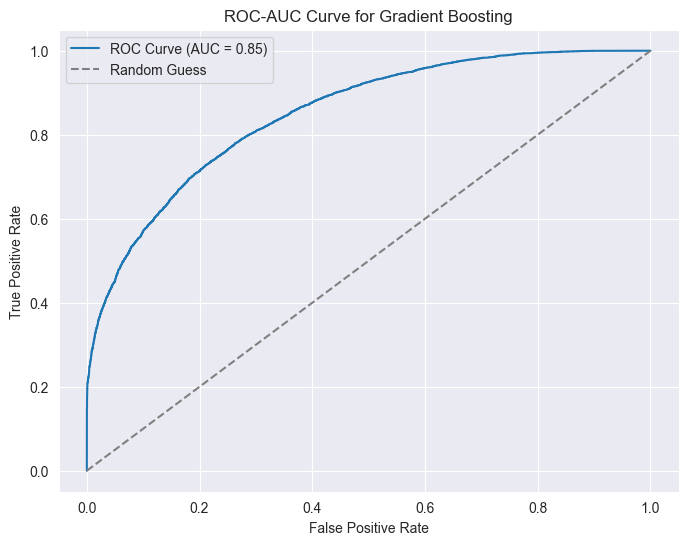

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_proba = gb_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Gradient Boosting')
plt.legend()
plt.show()

In [20]:
import joblib
joblib.dump(gb_model, '../Models/gb_model.pkl')
joblib.dump(scaler, '../Models/scaler.pkl')

['../Models/scaler.pkl']